http://ww2.amstat.org/publications/jse/v21n1/witt.pdf

http://nsidc.org/research/bios/fetterer.html

ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/north/monthly/data/N_08_extent_v3.0.csv

In [19]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(font_scale=2)
plt.style.use('seaborn-whitegrid')
%matplotlib inline

import pandas as pd

from scipy import stats

## Read Data

In [20]:
data = pd.read_csv('N_09_extent_v3.0.csv', dtype={'year': np.int32, 'extent': np.double})

In [21]:
data

,year,mo,data-type,region,extent,area
0,1979,9,Goddard,N,7.05,4.58
1,1980,9,Goddard,N,7.67,4.87
2,1981,9,Goddard,N,7.14,4.44
3,1982,9,Goddard,N,7.30,4.43
4,1983,9,Goddard,N,7.39,4.70
5,1984,9,Goddard,N,6.81,4.11
6,1985,9,Goddard,N,6.70,4.23
7,1986,9,Goddard,N,7.41,4.72
8,1987,9,Goddard,N,7.28,5.64
9,1988,9,Goddard,N,7.37,5.36


In [22]:
data.dtypes

year               int32
 mo                int64
    data-type     object
 region           object
 extent          float64
   area          float64
dtype: object

In [30]:
year = data['year']
extent = data[' extent']

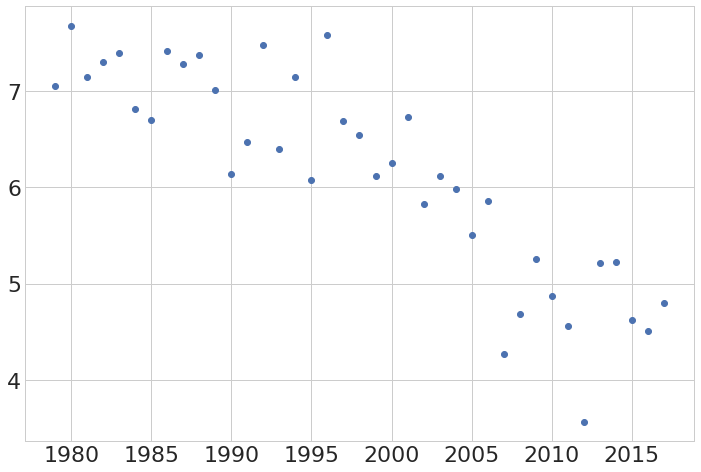

In [31]:
plt.figure(figsize=(12,8))
plt.plot(year, extent, 'o')

## Try a linear fit

-0.0874392666157372
180.81593888464477
-0.84157675651637
0.7082514371086135


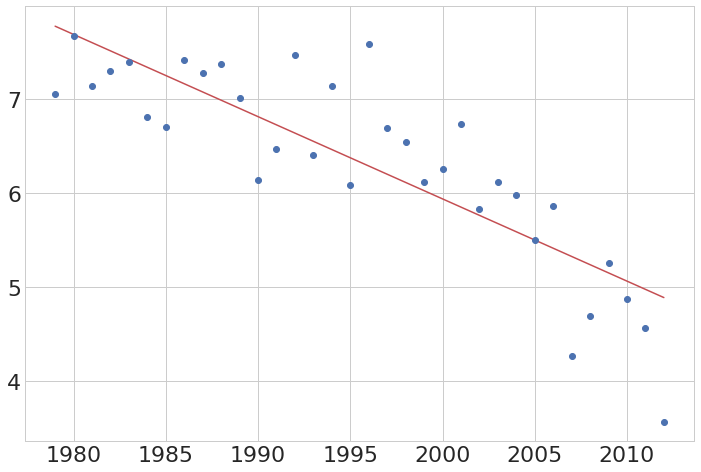

In [40]:
year = data['year'][:-5]
extent = data[' extent'][:-5]
slope, intercept, rvalue, pvalue, stderr = stats.linregress(year, extent)
yfit = slope*year + intercept

plt.figure(figsize=(12,8))
plt.plot(year, yfit, 'r-')
plt.plot(year, extent, 'o')
print(slope)
print(intercept)
print(rvalue)
print(rvalue**2)

### How far off is this fit?

180.81593888464477

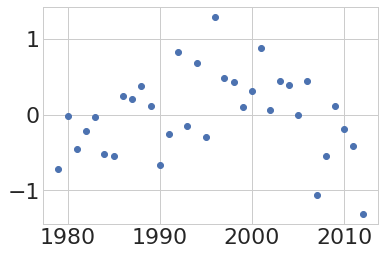

In [41]:
plt.plot(year, extent - yfit, 'o')
slope
intercept

### How did the linear fit "fit" as time time progresses?

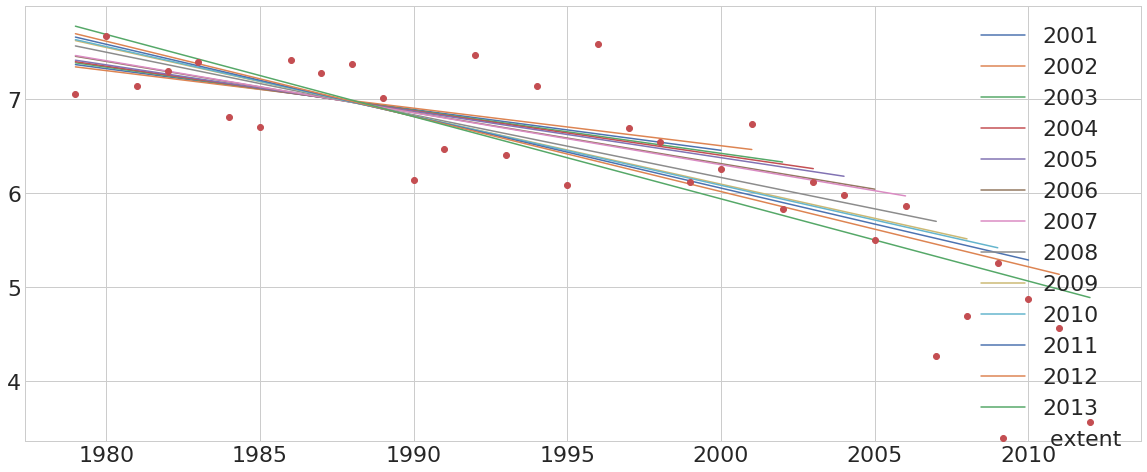

In [42]:
plt.figure(figsize=(20,8))
res = []
for y in range(22, len(extent)+1):
    slope, intercept, rvalue, pvalue, stderr = \
    stats.linregress(year[:y], extent[:y])
    yfit = slope*year[:y] + intercept

    plt.plot(year[:y], yfit, '-', label='%d' % (1979+y))

plt.plot(year[:y], extent[:y], 'o')
plt.legend()

### Let's try a quadratic fit

0.9039615786746971


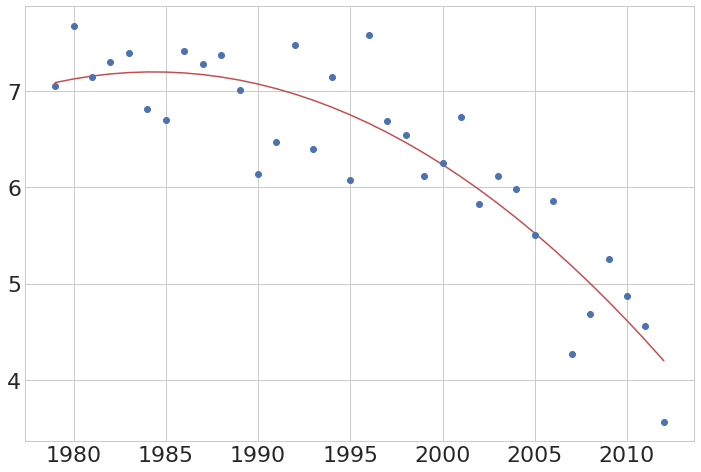

In [43]:
quadratic, linear, intercept = np.polyfit(year, extent, 2)
yfit = quadratic*year**2 + linear*year + intercept

plt.figure(figsize=(12,8))
plt.plot(year, yfit, 'r-')
plt.plot(year, extent, 'o')

rvalue = np.sqrt(1 - ((yfit - extent)**2).sum() / ((extent - np.mean(extent))**2).sum())

print(rvalue)

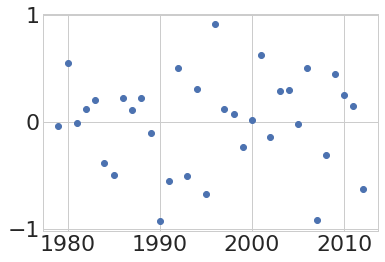

In [44]:
plt.plot(year, extent - yfit, 'o')

## What about a cubic?

What goes wrong here?

0.8964816181985995


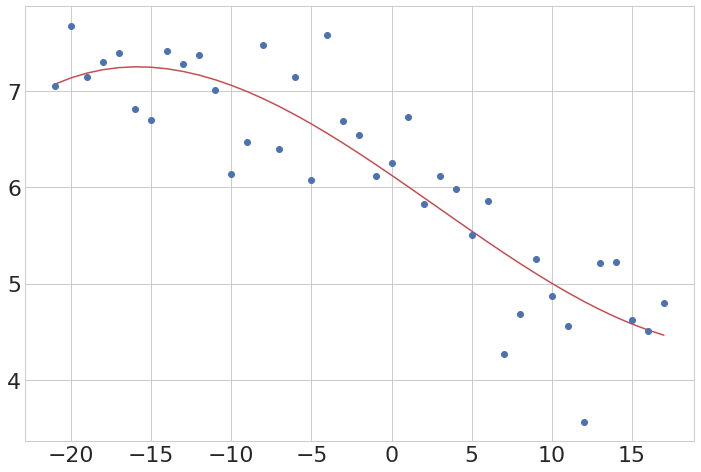

In [15]:
year = year
cubic, quadratic, linear, intercept = np.polyfit(year, extent, 3)
yfit = cubic*year**3 + quadratic*year**2 + linear*year + intercept

plt.figure(figsize=(12,8))
plt.plot(year, yfit, 'r-')
plt.plot(year, extent, 'o')

rvalue = np.sqrt(1 - ((yfit - extent)**2).sum() / ((extent - np.mean(extent))**2).sum())

print(rvalue)

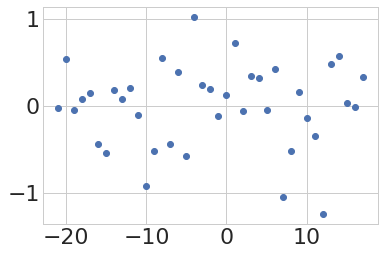

In [16]:
plt.plot(year, extent - yfit, 'o')